<a href="https://colab.research.google.com/github/saeed2015uppsala/my-new-project/blob/main/Kopia_av_Kopia_av_1DL210_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Google Colab

Read through the **Getting started** paragraph in the [official documentation](https://colab.research.google.com/). You may also want to take a look into the **More resources** section.

To add a new code block or text block, use the buttons in the menus above or hover your mouse between two blocks, where more buttons should appear.

To execute all code blocks within this document, select `Runtime -> Run all`. When you submit your solution, this should run without throwing an error.

Sometimes, previously defined variables cause trouble in later executions. If this is the case, you can select `Runtime -> Restart runtime` to restart the runtime and erase all previous definitions.

# Work Distribution

Saeid solved all problem by himself. That was a huge amount of job but he did it anyway. It might be less efficient with the time complexity but let's put it this way: Doing some is better than nothing. Peace out

# Initialisation

This section contains code that is later used to test, measure and plot your implementations. You need to run it once to initialise it.

⇩ Click here to initialise the code.

In [ ]:
# tests

import random

def shuffle(list):
  random.shuffle(list)
  return list

tests = [(name, unsorted, sorted(unsorted)) for (name, unsorted) in [
    ("empty list", []),
    ("one element", [42]),
    ("digits ascending", list(range(10))),
    ("digits descending", list(reversed(range(10)))),
    ("digits shuffled", shuffle(list(range(10)))),
    ("all entries the same", [42 for _ in range(10)]),
    ("some duplicates", shuffle(list(range(10)) + list(range(5)))),
    ("negative numbers", shuffle([x - 10 for x in list(range(20))])),
    ("float numbers", shuffle([x * 3.14 for x in list(range(20))])),
    ("mixed numbers", shuffle([x * 3.14 for x in list(range(10))] + list(range(10)))),
    *[("random numbers " + str(idx) + " (small)", [random.randrange(1000) for _ in range(20)]) for idx in range(0, 5)],
    *[("random numbers " + str(idx) + " (medium)", [random.randrange(10000) for _ in range(200)]) for idx in range(5, 10)],
    *[("random numbers " + str(idx) + " (large)", [random.randrange(100000) for _ in range(2000)]) for idx in range(10, 15)],
]]

def run_tests(fun):
  print("executing all tests on %s..." % (fun.__name__))
  ok = 0
  err = 0
  for name, input, expected in tests:
    copy = input.copy()
    try:
      fun(copy)
    except Exception as e:
      print("Test '%s' raised an exception!\n  input:     %s\n  expected:  %s\n  exception: %s" % (name, input, expected, e))
      raise e
    else:
      if copy == expected:
        print("Test '%s' passed!" % (name))
        ok += 1
      else:
        print("Test '%s' failed!\n  input:     %s\n  output:    %s\n  expected:  %s" % (name, input, copy, expected))
        err +=1
  print("%s (summary): %d/%d OK, %d/%d ERROR" % (fun.__name__, ok, len(tests), err, len(tests)))

# runtime parameters

num_samples = 20
sizes = [2000 * i for i in range(1, 10)]

# runtime plot

import matplotlib.pyplot as plt

def plot_runtime(funs, funs_checkered=None):
  for fun in funs:
    plt.plot(sizes, runtimeDict[fun.__name__], label=fun.__name__)
  if funs_checkered:
    plt.gca().set_prop_cycle(None)
    for fun in funs_checkered:
      plt.plot(sizes, runtimeDict[fun.__name__], '--', label=fun.__name__)

  plt.xlabel('List Length')
  plt.ylabel('Runtime (seconds)')
  plt.title('Runtime vs List Length')

  plt.legend()
  plt.show()

# runtime measurement

import time

runtimeDict = {}
def measure_runtime(funs):
  inputs = [[[random.random() for _ in range(size)] for _ in range(num_samples)] for size in sizes]

  for fun in funs:
    runtimes = []
    for batch in inputs:
      batch_rt = []
      for input in batch:
        copy = input.copy()
        start_time = time.time()
        fun(copy)
        end_time = time.time()
        batch_rt.append(end_time - start_time)
      runtimes.append(min(batch_rt))
    runtimeDict[fun.__name__] = runtimes

# Sorting Algorithms

In this exercise, you are going to implement the *Merge Sort*, *Quick Sort* and *Heap Sort* algorithms.

- Each of your sorting functions should accept an unsorted list of numbers and sort it. Of course, you are allowed to add as many helper functions as needed.
- Note that arrays (or lists) in the textbook are indexed from 1, whereas in Python (and most other programming languages) they are indexed from 0.
- Your implementation should have a good performance with respect to the asymptotic complexity found in the literature.

At the bottom of each code block, there is a function call to test your algorithm implementation. Run it to check if your implementation is correct.

Below the algorithms in this document, there is a code block that reports runtime statistics. Furthermore, at the end of the document, there are a couple of questions you should answer.

### 1. Merge Sort (2 points)

Implement Merge Sort as seen in the lecture.

Hint: Start by implementing `merge` and then use it to implement `mergesort`.

In [ ]:
def mergesort(arr):

    if len(arr) >1:
        left_arr = arr[:len(arr)//2]    # first right half of array
        right_arr = arr[len(arr)//2:]   # second left half of array

      #  Recursion in progress ...

        mergesort(left_arr)     # Sorting the left side sub array
        mergesort(right_arr)    # Sorting the right side sub array

        # Merging in progress ...

        left_array_index = 0
        right_array_index = 0
        merge_array_index =0

        while left_array_index < len(left_arr) and right_array_index < len(right_arr):
            if(left_arr[left_array_index] < right_arr[right_array_index]):
                 arr[merge_array_index] = left_arr[left_array_index]
                 left_array_index += 1    # next cell of left array, please ...

            else:
                arr[merge_array_index] = right_arr[right_array_index]
                right_array_index += 1     # next cell of right array, please ...

            merge_array_index += 1       # next cell of merge array

        # Moving the remaining of numbers in left array to merge array without considering the right array

        while left_array_index < len(left_arr):
            arr[merge_array_index] = left_arr[left_array_index]
            left_array_index += 1    # next cell of left array, please ...
            merge_array_index +=1    # next cell of the merge array, please ...

        while right_array_index < len(right_arr):
            arr[merge_array_index] = right_arr[right_array_index]
            right_array_index += 1    # next cell of right array, please ...
            merge_array_index +=1    # next cell of the merge array, please ...

    return arr

run_tests(mergesort)

executing all tests on mergesort...
Test 'empty list' passed!
Test 'one element' passed!
Test 'digits ascending' passed!
Test 'digits descending' passed!
Test 'digits shuffled' passed!
Test 'all entries the same' passed!
Test 'some duplicates' passed!
Test 'negative numbers' passed!
Test 'float numbers' passed!
Test 'mixed numbers' passed!
Test 'random numbers 0 (small)' passed!
Test 'random numbers 1 (small)' passed!
Test 'random numbers 2 (small)' passed!
Test 'random numbers 3 (small)' passed!
Test 'random numbers 4 (small)' passed!
Test 'random numbers 5 (medium)' passed!
Test 'random numbers 6 (medium)' passed!
Test 'random numbers 7 (medium)' passed!
Test 'random numbers 8 (medium)' passed!
Test 'random numbers 9 (medium)' passed!
Test 'random numbers 10 (large)' passed!
Test 'random numbers 11 (large)' passed!
Test 'random numbers 12 (large)' passed!
Test 'random numbers 13 (large)' passed!
Test 'random numbers 14 (large)' passed!
mergesort (summary): 25/25 OK, 0/25 ERROR


### 2. Quick Sort (2 points)

Implement Quick Sort as seen in the lecture.

Hint: Start by implementing `partition` and then use it to implement `quicksort`.

In [ ]:
def quicksort(arr):
    if len(arr) <= 1:  # List with 1 element is done already
        return arr

    def partition(arr, low, high):
        pivot = arr[low]  # Choose the pivot element as the first element
        left = low + 1  # First element
        right = high    # Second element

        done = False
        while not done: # If the pivot
            while left <= right and arr[left] <= pivot: # If the pivot element is already in the list and the right element is not in the list
                left = left + 1 # If the left element is already in the
            while arr[right] >= pivot and right >= left:    # If right is bigger than left and pivot
                right = right - 1
            if right < left:    # If the right element is already in the right direction
                done = True
            else:
                arr[left], arr[right] = arr[right], arr[left]  # Otherwise swap the places

        arr[low], arr[right] = arr[right], arr[low]

        return right

    def _quicksort(arr, low, high):   # quickort function overloading
        if low < high:
            pivot_index = partition(arr, low, high)
            _quicksort(arr, low, pivot_index - 1)
            _quicksort(arr, pivot_index + 1, high)

    _quicksort(arr, 0, len(arr) - 1)

run_tests(quicksort)


executing all tests on quicksort...
Test 'empty list' passed!
Test 'one element' passed!
Test 'digits ascending' passed!
Test 'digits descending' passed!
Test 'digits shuffled' passed!
Test 'all entries the same' passed!
Test 'some duplicates' passed!
Test 'negative numbers' passed!
Test 'float numbers' passed!
Test 'mixed numbers' passed!
Test 'random numbers 0 (small)' passed!
Test 'random numbers 1 (small)' passed!
Test 'random numbers 2 (small)' passed!
Test 'random numbers 3 (small)' passed!
Test 'random numbers 4 (small)' passed!
Test 'random numbers 5 (medium)' passed!
Test 'random numbers 6 (medium)' passed!
Test 'random numbers 7 (medium)' passed!
Test 'random numbers 8 (medium)' passed!
Test 'random numbers 9 (medium)' passed!
Test 'random numbers 10 (large)' passed!
Test 'random numbers 11 (large)' passed!
Test 'random numbers 12 (large)' passed!
Test 'random numbers 13 (large)' passed!
Test 'random numbers 14 (large)' passed!
quicksort (summary): 25/25 OK, 0/25 ERROR


### 3. Heap Sort (3 points)

Implement Heap Sort as seen in the lecture.

Note that you do not have to define a new class for heaps (unless you
want to), instead you can just use a plain list to store the heap and
pass along an extra parameter `heap_size` to the functions that need it.

Hint: Start by implementing `max_heapify` and `build_max_heap`, and then use them to implement `heapsort`.

In [ ]:
def swap(array,i,j):     # Swapping the elements of the list
    array[i], array[j] = array[j], array[i]

def siftDown(array,i,upper):  # The function we need to heapify our list
                    # we want the top most element also the largest element
    while (True):   # While or recursion could be used but recursion may end up to som errors in large number of elements
        l, r = i*2+1, i*2+2    # Sift down the parent to a child if it's needed. i represents the current index of the parent element
        if max(l,r) < upper:     # if either left or right child is less than parent
            if array[i] >= max(array[l],array[r]):  # Check if the parent is greater than both children
                break   # then we got nothing to do. just breaking out.
            elif array[l] > array[r]:  # Check that the left child is greater than right child
                swap(array,i,l)     # Swap the parent node with  the left child.
                i = l       # Move down the parent index one level down to the new parent
            else:
                swap(array,i,r)  # Otherwise change it with the right child.
                i = r   # Move down the parent index one level down to the new parent

        elif l < upper:
            if array[l] > array[i]:  # if the left child is greater than the parent
                swap(array,i,l)  # Swap them with each other
                i = l   # Move down the parent

            else: break # break out of the loop if there no elements left

        elif r < upper:  # The same process like above but this time for the right child
            if array[r] > array[i]:
                swap(array,i,r)
                i = r
            else: break

        else: break  # break out if there is no child left

def heapsort(array):
    for j in range((len(array) - 2) // 2, -1, -1):
        siftDown(array,j,len(array))

    for end in range(len(array)-1, 0, -1):
        swap(array,0,end)
        siftDown(array,0,end)

run_tests(heapsort)


executing all tests on heapsort...
Test 'empty list' passed!
Test 'one element' passed!
Test 'digits ascending' passed!
Test 'digits descending' passed!
Test 'digits shuffled' passed!
Test 'all entries the same' passed!
Test 'some duplicates' passed!
Test 'negative numbers' passed!
Test 'float numbers' passed!
Test 'mixed numbers' passed!
Test 'random numbers 0 (small)' passed!
Test 'random numbers 1 (small)' passed!
Test 'random numbers 2 (small)' passed!
Test 'random numbers 3 (small)' passed!
Test 'random numbers 4 (small)' passed!
Test 'random numbers 5 (medium)' passed!
Test 'random numbers 6 (medium)' passed!
Test 'random numbers 7 (medium)' passed!
Test 'random numbers 8 (medium)' passed!
Test 'random numbers 9 (medium)' passed!
Test 'random numbers 10 (large)' passed!
Test 'random numbers 11 (large)' passed!
Test 'random numbers 12 (large)' passed!
Test 'random numbers 13 (large)' passed!
Test 'random numbers 14 (large)' passed!
heapsort (summary): 25/25 OK, 0/25 ERROR


### 4. Runtime Comparisons (2 points)

The following code will measure the runtime of your algorithm implementations.

Compare the reported runtimes. What do you observe? How do you explain your observations?

How do the runtimes compare to those from the first assignment sheet (Insertion Sort, Selection Sort, Sink Sort)?

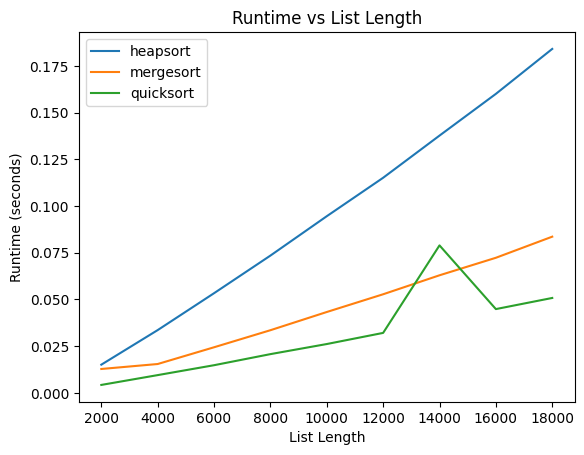

In [ ]:
measure_runtime([heapsort, mergesort, quicksort])
plot_runtime([heapsort, mergesort, quicksort])

**Answer:**

***Your answer here.***

### 5. Runtime Approximations (1 point)

Remark: In this question, we will take Heap Sort as an example, but the results also carry over to Merge Sort or Quick Sort.

Using the statistics from the tests, find a constant `c` such that `f_heap(n) = c * n` is a *linear* (!) function which *approximately* describes the runtime of Heap Sort in *seconds*, depending on the input size `n`.

Implement the function and look at the runtime plot below. You should notice that `f_heap` seems to be a good approximation of the runtime of Heap Sort (usually not much more than 10% error), at least in the displayed range of `n = 2000, ..., 18000`.

Compare to the asymptotic runtime of Heap Sort known from the lecture. How do you explain your observation? Will the approximation still be good with smaller or larger input sizes?

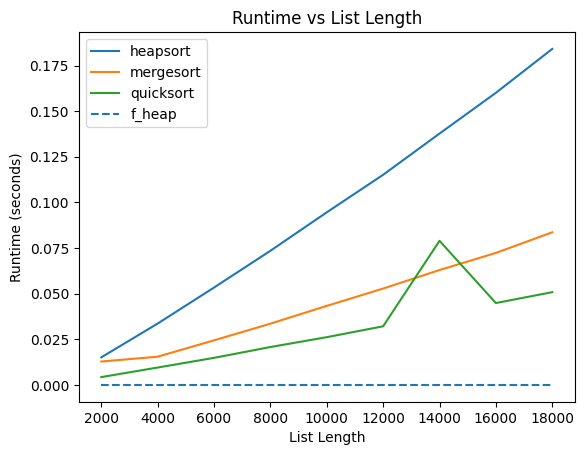

In [ ]:
def f_heap(size):
  return 0 * size

# plot all functions
runtimeDict[f_heap.__name__] = [f_heap(size) for size in sizes]
plot_runtime([heapsort, mergesort, quicksort], [f_heap])

**Answer:**

***Your answer here.***
Merge sort:
The time complexity of the mergesort is O(n log n) both in average and worst cases. Since the dividing and merging steps occur in a nested fashion, the overall time complexity is O(n log n).

Quick sort:
Time complesity of quick sort is also O(n log n) in average case and in the worst case is O(n^2).

Heap sort:

My Heap sort has time complexity O(n log n) in both average and worst-case scenarios.